In [1]:
# Install the necessary libraries for implementing DL: after launching this cell, restart kernel
!pip3 install --user keras scikit-learn pandas opencv-python

     |████████████████████████████████| 378kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 32.6MB/s eta 0:00:01
     |████████████████████████████████| 28.2MB 15.5MB/s eta 0:00:01
     |████████████████████████████████| 276kB 27.8MB/s eta 0:00:01
     |████████████████████████████████| 296kB 28.2MB/s eta 0:00:01
     |████████████████████████████████| 512kB 27.4MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# import the necessary packages

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from keras import regularizers
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras import regularizers

#import cv2

Using TensorFlow backend.


In [2]:
# Allocate specific GPU memory fraction for the current session to avoid memory fails

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Load data: images and labels

data = []
labels = []

In [4]:
data = np.array(np.load("../data/all_images_kimeye_299.npy"))
labels = np.array(np.load("../data/all_labels_kimeye.npy"))
labels = labels.astype(int)

In [5]:
"""
data2 = np.array(np.load("../data/all_images_acrima.npy"))
labels2 = np.array(np.load("../data/all_labels_acrima.npy"))
labels2 = labels2.astype(int)
"""

'\ndata2 = np.array(np.load("../data/all_images_acrima.npy"))\nlabels2 = np.array(np.load("../data/all_labels_acrima.npy"))\nlabels2 = labels2.astype(int)\n'

In [6]:
"""
data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)
"""

print(data.shape)
print(labels[0])

(1544, 299, 299, 3)
0


In [7]:
# shuffle the whole dataset

shuffle = list(zip(data, labels))
np.random.seed(42)
np.random.shuffle(shuffle)
data = np.array([shuffle[i][0] for i in range(len(shuffle))])
labels = np.array([shuffle[i][1] for i in range(len(shuffle))])
del shuffle


In [8]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
#labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

data = np.array(data)
print(labels)
#labels = np.array(labels)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


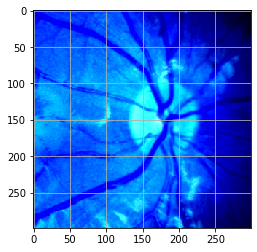

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


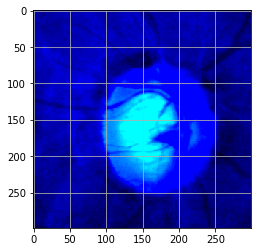

[0. 1.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


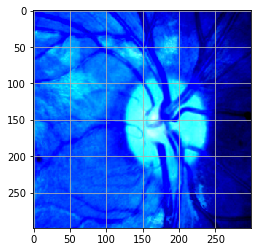

[1. 0.]


In [9]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
	test_size=0.2, random_state=42)

plt.grid(None)

plt.imshow(trainX[10])
plt.show()
print(trainY[10])

plt.grid(None)

plt.imshow(testX[276])
plt.show()
print(testY[276])

plt.grid(None)

plt.imshow(testX[208])
plt.show()
print(testY[208])

In [10]:
# initialize the training data augmentation object

trainAug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: [array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32)]


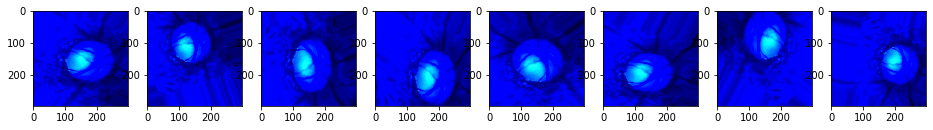

In [11]:
# visualize the different geometric transformations operated to the images

img_id = 600
cat_generator = trainAug.flow(trainX[img_id:img_id+1], 
 trainY[img_id:img_id+1], 
 batch_size=1) 
cat = [next(cat_generator) for i in range(0,8)] 
fig, ax = plt.subplots(1,8, figsize=(16, 6))

print('Labels:', [item[1][0] for item in cat]) 
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,8)]

In [132]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [133]:
# load InceptionV3, ensuring the head FC layer sets are left off, while at
# the same time adjusting the size of the input image tensor to the
# network
baseModel = Xception(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(299, 299, 3)))

In [134]:
# show a summary of the base model
print("[INFO] summary for base model...")
print(baseModel.summary())

[INFO] summary for base model...
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________

In [135]:
# construct the head of the model that will be placed on top of the
# the base model
layer_index = -1
headModel = baseModel.layers[layer_index].output

headModel = GlobalAveragePooling2D()(headModel)

headModel = Dense(2, activation="softmax")(headModel)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [136]:
print(len(baseModel.layers))

132


In [137]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
   layer.trainable = False

In [138]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [139]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print("[INFO] compiling model...")

lr_ = [1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
batch_ = [8, 12, 16]
opt = ['adam', 'sgd', 'rmsprop']

lr = 1e-6
momentum = 0.9
opt = SGD(lr=lr, momentum=momentum)
#opt = Adagrad(lr=lr, decay=lr / 100)
#opt = RMSprop(lr=lr)

model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=["accuracy"])
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

[INFO] compiling model...
SGD


In [140]:
epochs = 50
batch_size = 12

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)

[INFO] training head...
Epoch 1/50
101/102 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7564

ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,147,147] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node block2_sepconv2_bn_14/cond/else/_40/batchnorm/mul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_564439]

Function call stack:
keras_scratch_graph


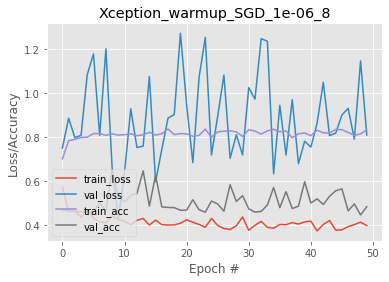

In [121]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "Xception_warmup_" + opt_name + '_' + str(lr) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('../evaluation/Xception/plots/' + title + '.png')

In [17]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(predictions)
print(testY)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
[[0.0704958  0.9295042 ]
 [0.23458615 0.7654138 ]
 [0.16149864 0.8385014 ]
 [0.20224552 0.7977545 ]
 [0.17314047 0.82685953]
 [0.06464345 0.93535656]
 [0.02402983 0.97597015]
 [0.22008803 0.77991194]
 [0.08335879 0.9166412 ]
 [0.12453107 0.8754689 ]
 [0.18383187 0.8161681 ]
 [0.07424045 0.92575955]
 [0.10462334 0.8953766 ]
 [0.331584   0.668416  ]
 [0.2486993  0.7513007 ]
 [0.14878356 0.85121644]
 [0.24947818 0.75052184]
 [0.10255538 0.89744467]
 [0.2634994  0.7365006 ]
 [0.5101079  0.48989207]
 [0.21449858 0.78550136]
 [0.1008176  0.89918244]
 [0.15475745 0.84524256]
 [0.4661809  0.5338191 ]
 [0.13754898 0.862451  ]
 [0.23774356 0.76225644]
 [0.08216361 0.9178364 ]
 [0.23988643 0.76011354]
 [0.15718749 0.8428125 ]
 [0.19120641 0.8087936 ]
 [0.05366582 0.9463342 ]
 [0.09857628 0.90142375]
 [0.08153971 0.91846025]
 [0.15981385 0.8401861 ]
 [0.1473297  0.8526703 ]
 [0.23721902 0.762781  ]
 [0.05397971 0.9460203 ]
 [0.31197825 0.6880217 ]
 [0.39601517 0.603984

In [0]:
score = model.evaluate(testX, testY,batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5739732858739368
Test accuracy: 0.7227979274611399


In [27]:
model.save_weights("../models/Xception/weights_" + title + ".h5")

In [28]:
baseModel2 = Xception(weights=None, include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

layer_index = -1
headModel2 = baseModel2.layers[layer_index].output
headModel2 = GlobalAveragePooling2D()(headModel2)

# let's add a fully-connected layer
dropout_rate = 0.5

headModel2 = Dropout(dropout_rate)(headModel2)
headModel2 = Dense(2, activation="softmax")(headModel2)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model2 = Model(inputs=baseModel2.input, outputs=headModel2)

In [29]:
model2.load_weights("../models/Xception/weights_Xception_warmup_0.5_SGD_1e-05_0.9_1e-06_8.h5")

In [107]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_12
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_45
13 block2_pool
14 batch_normalization_45
15 add_133
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_46
23 block3_pool
24 batch_normalization_46
25 add_134
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_47
33 block4_pool
34 batch_normalization_47
35 add_135
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_136
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
5

In [108]:
for layer in model.layers[:95]:
   layer.trainable = False
for layer in model.layers[95:]:
   layer.trainable = True

In [111]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [110]:
lr = 1e-4
momentum = 0.9
decay=1e-6
opt = SGD(lr=lr, momentum=momentum)
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

SGD


In [113]:
# initialize the training data augmentation object

trainAug2 = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug2 = ImageDataGenerator()


In [114]:
epochs = 150
batch_size = 8

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training network...")
H = model.fit_generator(
	trainAug2.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug2.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)


[INFO] training network...
Epoch 1/150
153/154 [============================>.] - ETA: 0s - loss: 0.4369 - accuracy: 0.7990

ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,147,147] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node block2_sepconv2_bn_11/cond/else/_40/batchnorm/mul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_446321]

Function call stack:
keras_scratch_graph


In [0]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "Xception_fine_tuning_" + str(dropout_rate) + '_' + opt_name + '_' + str(lr) + '_' + str(momentum) + '_' + str(decay) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('../evaluation/Xception/plots/' + title + '.png')

In [0]:
score = model.evaluate(testX, testY,batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])